# Pandas Lab

Ce notebook constitue la 4e partie de la formation d'analyse de données et dataviz avec Python.
Il succède à Seaborn, Numpy.
Ce notebook consiste en une suite de questions auxquelles on répond par des instructions.

In [1]:
## import des packages :
import pandas
import matplotlib.pyplot as plt
import seaborn

In [5]:
seaborn.set(color_codes=True) ## permet de paramétrer les couleurs de base de sns

In [2]:
## import des variables :
data = pandas.read_csv(".\\DONNEES\\automobiles.csv", sep=",", 
                       decimal=".", encoding="utf-8", header=0)

## Afficher les 5 premières lignes :
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Analyse univariée avec Seaborn

In [3]:
data.dtypes

symboling                int64
normalized_losses        int64
make                    object
fuel_type               object
aspiration              object
number_of_doors         object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm                 int64
city_mpg                 int64
highway_mpg              int64
price                    int64
dtype: object

In [6]:
data.isna().sum() ## OK pas de valeur NA

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

<AxesSubplot: xlabel='price', ylabel='Count'>

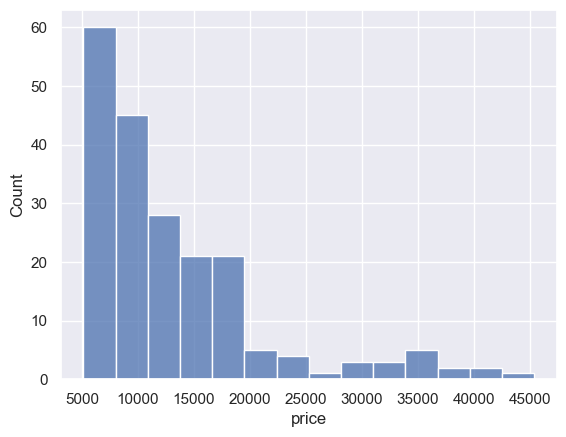

In [8]:
seaborn.histplot(x=data["price"])

In [10]:
## quel est la taille du jeu de données ?
data.shape

(201, 26)

In [12]:
## Quel est le prix moyen ?
round(data["price"].mean(), 2) ## 13207.13

13207.13

In [20]:
## Quelle est la voiture la moins chère ?
data[ data["price"] == data["price"].min() ]
## Quelle est la voiture la plus chère ?
data[ data["price"] == data["price"].max() ]

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
71,1,140,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400


In [23]:
## combien de voiture ont plus de 100 chevaux ?
len(data[ data["horsepower"] > 100 ]) ## 90

90

In [27]:
## combien de modèle de voiture existe ?
data[ data["body_style"] == "hatchback" ].info() ## 68

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 2 to 186
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            68 non-null     int64  
 1   normalized_losses    68 non-null     int64  
 2   make                 68 non-null     object 
 3   fuel_type            68 non-null     object 
 4   aspiration           68 non-null     object 
 5   number_of_doors      68 non-null     object 
 6   body_style           68 non-null     object 
 7   drive_wheels         68 non-null     object 
 8   engine_location      68 non-null     object 
 9   wheel_base           68 non-null     float64
 10  length               68 non-null     float64
 11  width                68 non-null     float64
 12  height               68 non-null     float64
 13  curb_weight          68 non-null     int64  
 14  engine_type          68 non-null     object 
 15  number_of_cylinders  68 non-null     obje

<AxesSubplot: ylabel='make'>

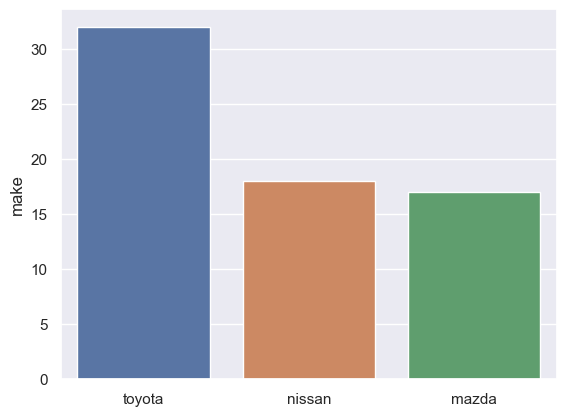

In [47]:
## Quels sont 3 principaux constructeurs ?
data["make"].unique() ## on commence par aller chercher les constructeurs.
## ensuite on va compter :
seaborn.barplot( x=data["make"].value_counts().head(3).index, 
                y=data["make"].value_counts().head(3) ) 
## le résultat de data["make"].value_counts().head(3) est une série pandas

In [48]:
## Quelqu'un a acheté une voiture à 7099, qui est le constructeur ?
data[ data["price"]==7099]["make"]

87    nissan
Name: make, dtype: object

In [49]:
## Quelles sont les voitures qui valent plus de 40000 ?
data[ data["price"] > 40000 ]

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
15,0,149,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
70,0,140,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960
71,1,140,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400


In [50]:
## Which are the cars are both a sedan and priced lower than 7000 :
data[ (data["body_style"] == "sedan") & (data["price"] < 7000) ]

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
19,0,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575
24,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
42,0,110,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
50,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
82,1,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,6989
86,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499
88,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649
89,1,122,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6849
118,1,154,plymouth,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
152,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938
